### Revision de Datos
##### En este notebook exploraremos la data de vehicles_us y limpiaremos de ser necesario                                             

In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importar la data
df = pd.read_csv('../vehicles_us.csv')

In [4]:
# Exploracion de la data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
# Encontrar todos los valores faltantes de las columnas
df.isnull().sum()


price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [6]:
#mostrar la informacion
df.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


### Limpiar la Data
#### Ahora limpiaremos la data se removeran los valores atipicos y valores faltantes

In [7]:
#crear una lista de todas las columnas en las que los valores faltantes deben cambiarse a cero y luego convertirse a int
filllna_and_int = ['is_4wd', 'cylinders', 'model_year', 'odometer']
for i in filllna_and_int:
    df[i] = df[i].fillna(0)
    df[i] = df[i].astype(int)

#Rellenar los valores faltantes de pintura con 'unknown'
df["paint_color"] = df["paint_color"].fillna("unknown")

In [8]:
#Funcion que rellena los valores de cylinders buscando el mismo modelo de automóvil del mismo año y tomando información de allí
def cylinder_check(row):
    '''Esta función comprobará si falta el cilindro y si es así lo llenará con el cilindro más común para ese modelo de auto y año'''
    if row["cylinders"] == 0:
        cylinder = df.loc[df["model"] == row["model"]].loc[df["model_year"] == row["model_year"]]["cylinders"].unique()
        for i in range(len(cylinder)):
            if cylinder[i] != 0:
                return cylinder[i]
    return row["cylinders"]

df["cylinders"] = df.apply(cylinder_check, axis=1)

In [9]:
#Función que rellena los valores del odómetro que son iguales a cero con el valor del odómetro de un coche similar
def odometer_check(row):
    '''Esta función comprobará si falta el odómetro y si falta lo llenará con el odómetro más común para ese modelo de auto y año'''
    if row["odometer"] == 0:
        odometer = df.loc[df["model"] == row["model"]].loc[df["model_year"] == row["model_year"]].loc[df["type"] == row["type"]]["odometer"].unique()
        for i in range(len(odometer)):
            if odometer[i] != 0:
                return odometer[i]
    return row["odometer"]

df["odometer"] = df.apply(odometer_check, axis=1)        

In [10]:
#Función que completa los valores del año del modelo que son iguales a cero con el valor del año del modelo de un automóvil similar
def model_year_check(row):
    '''This function will check if the model year is missing and if it is it will fill it with the most common model year for that car model and year'''
    if row["model_year"] == 0:
        model_year = df.loc[df["model"] == row["model"]].loc[df["type"] == row["type"]]["model_year"].unique()
        for i in range(len(model_year)):
            if model_year[i] != 0:
                return model_year[i]
    return row["model_year"]

df["model_year"] = df.apply(model_year_check, axis=1)

In [11]:
#Función que encuentra el color de pintura más común para cada modelo y completa con él los valores faltantes
def paint_color_check(row):
    '''Esta función comprobará si falta el color de pintura y, si es así, lo rellenará con el color de pintura más común para ese modelo de coche.'''
    if row["paint_color"] == "unknown":
        paint_color = df.loc[df["model"] == row["model"]]["paint_color"].unique()
        for i in range(len(paint_color)):
            if paint_color[i] != "unknown":
                return paint_color[i]
    return row["paint_color"]

df["paint_color"] = df.apply(paint_color_check, axis=1)    

In [12]:
#Extraer el "manufacturer" del modelo y guárdarlo en una nueva columna
df["manufacturer"] = df["model"].str.split(" ", n = 1, expand = True)[0]

In [13]:
#Extraer el nombre del modelo y guárdarlo en una nueva columna
df["model_name"] = df["model"].str.split(" ", n = 1, expand = True)[1]

In [14]:
#Eliminar columna de "model"
df.drop(columns=["model"], inplace=True)

In [15]:
#Revision de la data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         51525 non-null  int64 
 1   model_year    51525 non-null  int64 
 2   condition     51525 non-null  object
 3   cylinders     51525 non-null  int64 
 4   fuel          51525 non-null  object
 5   odometer      51525 non-null  int64 
 6   transmission  51525 non-null  object
 7   type          51525 non-null  object
 8   paint_color   51525 non-null  object
 9   is_4wd        51525 non-null  int64 
 10  date_posted   51525 non-null  object
 11  days_listed   51525 non-null  int64 
 12  manufacturer  51525 non-null  object
 13  model_name    51525 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.5+ MB


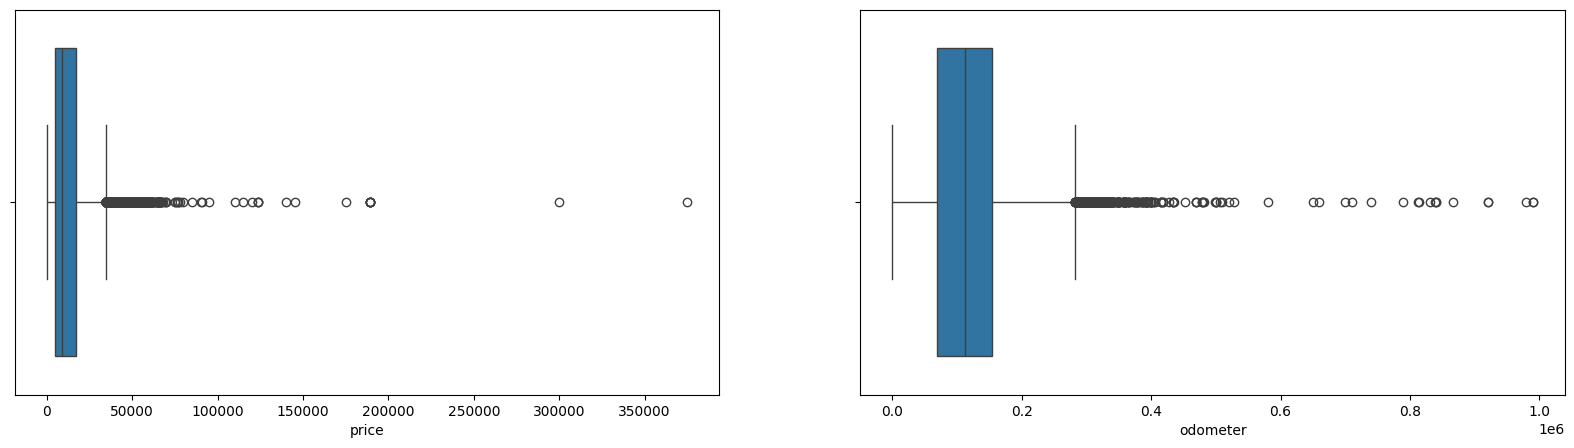

In [16]:
#Mostar los outliners en boxplot
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.boxplot(x=df["price"], ax=ax[0])
sns.boxplot(x=df["odometer"], ax=ax[1])
plt.show()

In [17]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Calculate Q1, Q3, and IQR for numeric columns
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Filter out rows with outliers
df_cleaned = df[~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

In [18]:
#Cambiar el tipo de valores de fecha de publicación a datatime
df["date_posted"] = pd.to_datetime(df["date_posted"], format='%Y-%m-%d')

In [19]:
#Revisar la data
df.head(15)

,price,model_year,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer,model_name
0,9400,2011,good,6,gas,145000,automatic,SUV,black,1,2018-06-23,19,bmw,x5
1,25500,2003,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,ford,f-150
2,5500,2013,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,hyundai,sonata
3,1500,2003,fair,8,gas,99000,automatic,pickup,white,0,2019-03-22,9,ford,f-150
4,14900,2017,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,chrysler,200
5,14990,2014,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,chrysler,300
6,12990,2015,excellent,4,gas,79212,automatic,sedan,white,0,2018-12-27,73,toyota,camry
7,15990,2013,excellent,6,gas,109473,automatic,SUV,black,1,2019-01-07,68,honda,pilot
8,11500,2012,excellent,4,gas,104174,automatic,SUV,brown,1,2018-07-16,19,kia,sorento
9,9200,2008,excellent,6,gas,147191,automatic,SUV,blue,1,2019-02-15,17,honda,pilot


In [20]:
#Exportar la nueva data limpia
df.to_csv('../vehicles_us_cleaned.csv', index=False)

### Visualizacion de los datos
#### Ahora que hemos limpiado los datos, los visualizaremos para darnos unas mejores ideas.

In [21]:
#Plot histogram de condition vs year
fig = px.histogram(df, x="model_year", color="condition", hover_data=df.columns)
fig.show()